In [760]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [643]:
np.random.seed(1)
# training set
x1 =  np.random.uniform(6,size = 100) # x1 between [0,6]
x1 = np.around(x1, 2)
x2 =  np.random.uniform(6,size = 100) # x2 between [0,6]
x2 = np.around(x2, 2)
x3 =  np.random.uniform(-6, 0 ,size = 100) # x3 between [-6,0]
x3 = np.around(x3, 2)
x4 =  np.random.uniform(-6, 0, size = 100) # x4 between [-6,0]
x4 = np.around(x4, 2)

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y': [0]*50})
# dataset_0_0
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y': [1]*50})
# print(dataset_0_1)
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y': [1]*50})
# dataset_1_0
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y': [0]*50})
# dataset_1_1
train_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
# randomly shuffled the train_data
# train_data = train_data.sample(frac = 1).reset_index(drop = True)
train_data

,x1,x2,y
0,3.91,4.37,0
1,2.40,3.36,0
2,6.00,1.57,0
3,4.49,4.21,0
4,5.27,1.46,0
...,...,...,...
45,-5.59,-0.94,0
46,-3.73,-3.71,0
47,-5.52,-1.50,0
48,-0.10,-2.93,0


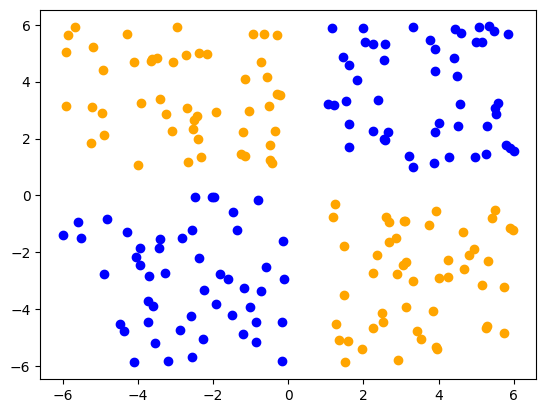

In [644]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(train_data['x1'][train_data['y'] == 0], train_data['x2'][train_data['y'] == 0], color = 'blue')
ax.scatter(train_data['x1'][train_data['y'] == 1], train_data['x2'][train_data['y'] == 1], color = 'orange')

In [645]:
np.random.seed(20)
# test set
x1 =  np.random.uniform(6,size = 100) # x1 between [0,6]
x1 = np.around(x1, 2)
x2 =  np.random.uniform(6,size = 100) # x2 between [0,6]
x2 = np.around(x2, 2)
x3 =  np.random.uniform(-6, 0 ,size = 100) # x3 between [-6,0]
x3 = np.around(x3, 2)
x4 =  np.random.uniform(-6, 0, size = 100) # x4 between [-6,0]
x4 = np.around(x4, 2)

dataset_0_0 = pd.DataFrame({'x1': x1[ : 50], 'x2': x2[ : 50], 'y1': [0]*50})
# dataset_0_0
dataset_0_1 = pd.DataFrame({'x1': x1[50 : ], 'x2': x4[ : 50], 'y1': [1]*50})
# dataset_0_1
dataset_1_0 = pd.DataFrame({'x1': x3[ : 50], 'x2': x2[50 : ], 'y1': [1]*50})
# dataset_1_0
dataset_1_1 = pd.DataFrame({'x1': x3[50 : ], 'x2': x4[50 : ], 'y1': [0]*50})
# dataset_1_1
test_data = pd.concat([dataset_0_0, dataset_0_1, dataset_1_0, dataset_1_1])
# randomly shuffled the test_data
# test_data = test_data.sample(frac= 1).reset_index(drop= True) 
# test_data

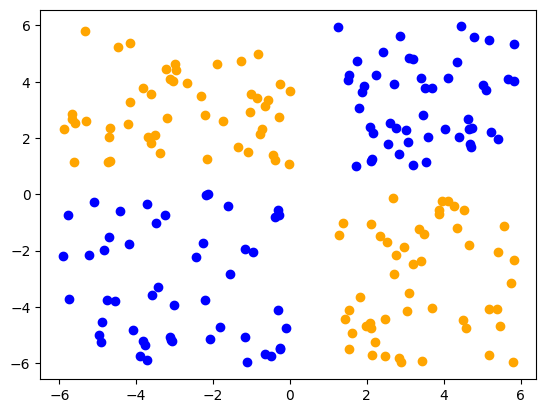

In [646]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(test_data['x1'][test_data['y1'] == 0], test_data['x2'][test_data['y1'] == 0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1'] == 1], test_data['x2'][test_data['y1'] == 1], color = 'orange')

In [881]:
# # Define the MLP model
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, 2)
#         self.fc3 = nn.Linear(2, 1)
#         self.sigmoid = nn.Sigmoid()
    


#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.sigmoid(out)
#         out = self.fc2(out)
#         out = self.fc3(out)
#         out = self.sigmoid(out)
#         return out


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    


    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [882]:
# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [883]:
# Shuffle train and test data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# Define features and target variable
X_train = train_data[['x1', 'x2']].values.astype(np.float32)
y_train = train_data['y'].values.reshape(-1, 1).astype(np.float32)
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)

# Create DataLoader
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

In [884]:
# Initialize the model, loss function, and optimizer
model = MLP(input_size=2, hidden_size=4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)
model

MLP(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [885]:
# baseline accuracy and loss
accuracy, train_loss = 0, 0
for inputs, labels in train_loader:
    outputs = model(inputs)
    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
    accuracy += torch.sum(output_labels == labels)
    loss = criterion(outputs, labels)
    train_loss += loss.item() 

print(f'Baseline accuracy {accuracy / len(train_loader.dataset)}, baseline loss {train_loss/len(train_loader)}')

Baseline accuracy 0.5, baseline loss 0.7043057084083557


In [886]:
# Training loop
epochs = 1000
train_losses = []
for epoch in range(epochs):
    train_loss = 0.0
    accuracy = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        accuracy += torch.sum(output_labels == labels)
        loss = criterion(outputs, labels)
        # print('Loss: ', loss)
        loss.backward()
        optimizer.step()
        # train_loss += loss.item() * inputs.size(0)
        train_loss += loss.item() 
    
    if epoch % 100 ==0:
        print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f}')

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
# print(torch.hstack([inputs, outputs, output_labels, labels]))
total_train_loss = np.mean(train_losses)
print(f'Training loss: {total_train_loss:.4f}')

Epoch 0 Accuracy 0.5000
Epoch 100 Accuracy 1.0000
Epoch 200 Accuracy 0.9950
Epoch 300 Accuracy 0.9950
Epoch 400 Accuracy 0.9950
Epoch 500 Accuracy 0.9950
Epoch 600 Accuracy 1.0000
Epoch 700 Accuracy 1.0000
Epoch 800 Accuracy 1.0000
Epoch 900 Accuracy 1.0000
Training loss: 0.1010


In [887]:
test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        # print(torch.hstack([inputs, outputs, output_labels, labels]))
        accuracy += torch.sum(output_labels == labels)
        loss = criterion(outputs, labels)
        # test_loss += loss.item() * inputs.size(0)
        test_loss += loss.item()
test_loss /= len(test_loader)
print(f'Test loss: {test_loss:.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

Test loss: 0.0370, accuracy: 0.9950


In [888]:
input = torch.tensor([0.23, -0.45])
output = model(input)
print(output)

tensor([0.7198], grad_fn=<SigmoidBackward0>)


In [889]:
xx = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
yy = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
xx, yy = torch.meshgrid(xx, yy)
xx1 = xx.reshape(-1, 1)
yy1 = yy.reshape(-1, 1)
data = torch.hstack([xx1,yy1])
z = model(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(13,13)
# torch.hstack([xx, yy, z])

C:\Users\Hp\AppData\Local\Temp\ipykernel_14340\4181658087.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
C:\Users\Hp\AppData\Local\Temp\ipykernel_14340\4181658087.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)


Decision surface of MLP 

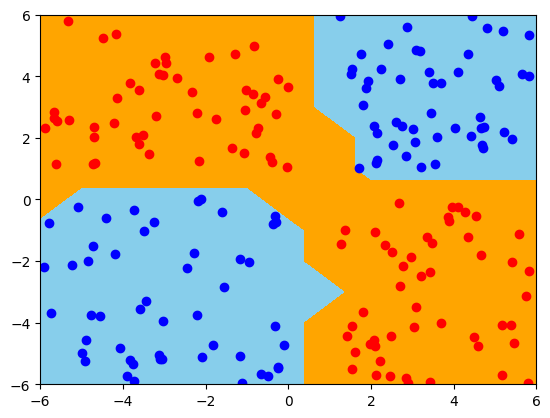

In [890]:
fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')

MLP with L1 regularisation

In [902]:
# Define the MLP model
class MLP_L2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    


    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [903]:
# 5-fold cross validation
K = 5
epochs = 1000
block = len(train_data) // K
valid_loss_acc = {}

for learning_rate in [0.003,0.01, 0.03, 0.1, 0.3, 1]:
    for lagrange_multiplier in [0.001, 0.003, 0.01, 0.03, 0.1]:
        k_cross_val_loss = []
        k_cross_val_acc = []
        for i in range(K):
            start = i * block
            end = start + block
            val_dataset = train_data[start : end].reset_index(drop = True)
            X_val = val_dataset[['x1', 'x2']].values.astype(np.float32)
            y_val = val_dataset['y'].values.reshape(-1, 1).astype(np.float32)
            val_dataset = CustomDataset(X_val, y_val)
            val_loader = DataLoader(val_dataset, batch_size=40, shuffle=True)

            Xy_train = pd.concat([train_data[ : start], train_data[end : ]], axis = 0).reset_index(drop = True)
            X_train = Xy_train[['x1', 'x2']].values.astype(np.float32)
            y_train = Xy_train['y'].values.reshape(-1, 1).astype(np.float32)
            train_dataset = CustomDataset(X_train, y_train)
            train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
            
            # initialise MLP
            model = MLP_L2(input_size=2, hidden_size=4)
            criterion = nn.BCELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # training the model
            train_losses = []
            for epoch in range(epochs):
                train_loss = 0.0
                accuracy = 0
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
                    accuracy += torch.sum(output_labels == labels)
                    loss = criterion(outputs, labels)

                    sum = 0
                    for params in model.parameters():
                        params = params.view(-1)
                        sum += torch.sum(params)

                    loss += lagrange_multiplier * sum
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item() 
                
                if epoch % 100 == 0:
                    print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f}')

                train_loss /= len(train_loader)
                train_losses.append(train_loss)
                
            # print(torch.hstack([inputs, outputs, output_labels, labels]))
            total_train_loss = np.mean(train_losses)
            print(f'In {i+1} Cross validation, Training loss: {total_train_loss:.4f}')


            # validate
            val_loss = 0.0
            accuracy = 0
            with torch.no_grad():
                for inputs, labels in val_loader:    
                    outputs = model(inputs)
                    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
                    # print(torch.hstack([inputs, outputs, output_labels, labels]))
                    accuracy += torch.sum(output_labels == labels)

                    loss = criterion(outputs, labels)
                    for params in model.parameters():
                        params = params.view(-1)
                        params = torch.square(params)
                        sum += torch.sum(params)
                    loss += lagrange_multiplier * sum

                    val_loss += loss.item()

            k_cross_val_loss.append(val_loss/len(val_loader))
            k_cross_val_acc.append(accuracy/len(val_dataset))
            print(f'Validation loss: {val_loss/len(val_loader):.4f}, Validation accuracy: {accuracy/len(val_dataset):.4f}')

        valid_loss_acc[f'{learning_rate}_{lagrange_multiplier}_loss'] = np.mean(k_cross_val_loss)
        valid_loss_acc[f'{learning_rate}_{lagrange_multiplier}_acc'] = np.mean(k_cross_val_acc)

Epoch 0 Accuracy 0.5000
Epoch 20 Accuracy 0.5000
Epoch 40 Accuracy 0.5000
Epoch 60 Accuracy 0.5000
Epoch 80 Accuracy 0.5000
Epoch 100 Accuracy 0.6000
Epoch 120 Accuracy 0.6687
Epoch 140 Accuracy 0.6625
Epoch 160 Accuracy 0.6625
Epoch 180 Accuracy 0.6562
Epoch 200 Accuracy 0.6562
Epoch 220 Accuracy 0.6562
Epoch 240 Accuracy 0.6562
Epoch 260 Accuracy 0.6562
Epoch 280 Accuracy 0.6562
Epoch 300 Accuracy 0.6562
Epoch 320 Accuracy 0.6562
Epoch 340 Accuracy 0.6625
Epoch 360 Accuracy 0.6687
Epoch 380 Accuracy 0.6687
Epoch 400 Accuracy 0.6750
Epoch 420 Accuracy 0.6812
Epoch 440 Accuracy 0.6812
Epoch 460 Accuracy 0.7188
Epoch 480 Accuracy 0.7625
Epoch 500 Accuracy 0.8188
Epoch 520 Accuracy 0.8375
Epoch 540 Accuracy 0.8625
Epoch 560 Accuracy 0.8813
Epoch 580 Accuracy 0.8875
Epoch 600 Accuracy 0.9000
Epoch 620 Accuracy 0.9062
Epoch 640 Accuracy 0.9062
Epoch 660 Accuracy 0.9062
Epoch 680 Accuracy 0.9187
Epoch 700 Accuracy 0.9187
Epoch 720 Accuracy 0.9125
Epoch 740 Accuracy 0.9187
Epoch 760 Accuracy

In [911]:
t = pd.DataFrame(valid_loss_acc, index = ['val']).T
t['val'] = t['val'].apply(lambda x: round(x, 2))
t

,val
0.003_0.001_loss,0.39
0.003_0.001_acc,0.91
0.003_0.003_loss,0.54
0.003_0.003_acc,0.91
0.003_0.01_loss,1.17
0.003_0.01_acc,0.82
0.003_0.03_loss,3.03
0.003_0.03_acc,0.65
0.003_0.1_loss,7.98
0.003_0.1_acc,0.58


In [912]:
model = MLP_L2(input_size=2, hidden_size=4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)
lagrange_multiplier = 0.001

# training the model
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        sum = 0
        for params in model.parameters():
            params = params.view(-1)
            params = torch.square(params)
            sum += torch.sum(params)

        loss += lagrange_multiplier * sum
        loss.backward()
        optimizer.step()
        

In [913]:
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)
test_dataset = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        # print(torch.hstack([inputs, outputs, output_labels, labels]))
        accuracy += torch.sum(output_labels == labels)
        loss = criterion(outputs, labels)
        # test_loss += loss.item() * inputs.size(0)
        test_loss += loss.item()
test_loss /= len(test_loader)
print(f'Test loss: {test_loss:.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

Test loss: 0.2005, accuracy: 0.9500


C:\Users\Hp\AppData\Local\Temp\ipykernel_14340\1642735607.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
C:\Users\Hp\AppData\Local\Temp\ipykernel_14340\1642735607.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)


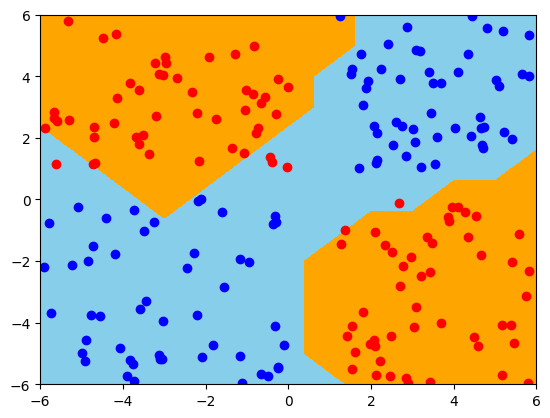

In [914]:
xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
xx1, xx2 = torch.meshgrid(xx1, xx2)
xx1 = xx1.reshape(-1, 1)
xx2 = xx2.reshape(-1, 1)
data = torch.hstack([xx1,xx2])
z = model(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(13,13)

fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')

MLP with L2 Regularisation

In [894]:
# Define the MLP model
class MLP_L2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP_L2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    


    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [895]:
# 5-fold cross validation
K = 5
epochs = 1000
block = len(train_data) // K
valid_loss_acc = {}

for learning_rate in [0.03]:
    for lagrange_multiplier in [0.001, 0.003, 0.01, 0.03, 0.1]:
        k_cross_val_loss = []
        k_cross_val_acc = []
        for i in range(K):
            start = i * block
            end = start + block
            val_dataset = train_data[start : end].reset_index(drop = True)
            X_val = val_dataset[['x1', 'x2']].values.astype(np.float32)
            y_val = val_dataset['y'].values.reshape(-1, 1).astype(np.float32)
            val_dataset = CustomDataset(X_val, y_val)
            val_loader = DataLoader(val_dataset, batch_size=40, shuffle=True)

            Xy_train = pd.concat([train_data[ : start], train_data[end : ]], axis = 0).reset_index(drop = True)
            X_train = Xy_train[['x1', 'x2']].values.astype(np.float32)
            y_train = Xy_train['y'].values.reshape(-1, 1).astype(np.float32)
            train_dataset = CustomDataset(X_train, y_train)
            train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
            
            # initialise MLP
            model = MLP_L2(input_size=2, hidden_size=4)
            criterion = nn.BCELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # training the model
            train_losses = []
            for epoch in range(epochs):
                train_loss = 0.0
                accuracy = 0
                for inputs, labels in train_loader:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
                    accuracy += torch.sum(output_labels == labels)
                    loss = criterion(outputs, labels)

                    sum = 0
                    for params in model.parameters():
                        params = params.view(-1)
                        params = torch.square(params)
                        sum += torch.sum(params)

                    loss += lagrange_multiplier * sum
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item() 
                
                if epoch % 20 == 0:
                    print(f'Epoch {epoch} Accuracy {accuracy/len(train_loader.dataset):.4f}')

                train_loss /= len(train_loader)
                train_losses.append(train_loss)
                
            # print(torch.hstack([inputs, outputs, output_labels, labels]))
            total_train_loss = np.mean(train_losses)
            print(f'In {i+1} Cross validation, Training loss: {total_train_loss:.4f}')


            # validate
            val_loss = 0.0
            accuracy = 0
            with torch.no_grad():
                for inputs, labels in val_loader:    
                    outputs = model(inputs)
                    output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
                    # print(torch.hstack([inputs, outputs, output_labels, labels]))
                    accuracy += torch.sum(output_labels == labels)

                    loss = criterion(outputs, labels)
                    for params in model.parameters():
                        params = params.view(-1)
                        params = torch.square(params)
                        sum += torch.sum(params)
                    loss += lagrange_multiplier * sum

                    val_loss += loss.item()

            k_cross_val_loss.append(val_loss/len(val_loader))
            k_cross_val_acc.append(accuracy/len(val_dataset))
            print(f'Validation loss: {val_loss/len(val_loader):.4f}, Validation accuracy: {accuracy/len(val_dataset):.4f}')

        valid_loss_acc[f'{learning_rate}_{lagrange_multiplier}_loss'] = np.mean(k_cross_val_loss)
        valid_loss_acc[f'{learning_rate}_{lagrange_multiplier}_acc'] = np.mean(k_cross_val_acc)







Epoch 0 Accuracy 0.5000
Epoch 20 Accuracy 0.7125
Epoch 40 Accuracy 0.8250
Epoch 60 Accuracy 0.8875
Epoch 80 Accuracy 0.9250
Epoch 100 Accuracy 0.9500
Epoch 120 Accuracy 0.9500
Epoch 140 Accuracy 0.9563
Epoch 160 Accuracy 0.9563
Epoch 180 Accuracy 0.9563
Epoch 200 Accuracy 0.9563
Epoch 220 Accuracy 0.9563
Epoch 240 Accuracy 0.9563
Epoch 260 Accuracy 0.9563
Epoch 280 Accuracy 0.9563
Epoch 300 Accuracy 0.9563
Epoch 320 Accuracy 0.9563
Epoch 340 Accuracy 0.9563
Epoch 360 Accuracy 0.9563
Epoch 380 Accuracy 0.9563
Epoch 400 Accuracy 0.9563
Epoch 420 Accuracy 0.9563
Epoch 440 Accuracy 0.9563
Epoch 460 Accuracy 0.9563
Epoch 480 Accuracy 0.9563
Epoch 500 Accuracy 0.9563
Epoch 520 Accuracy 0.9563
Epoch 540 Accuracy 0.9563
Epoch 560 Accuracy 0.9625
Epoch 580 Accuracy 0.9563
Epoch 600 Accuracy 0.9563
Epoch 620 Accuracy 0.9563
Epoch 640 Accuracy 0.9563
Epoch 660 Accuracy 0.9563
Epoch 680 Accuracy 0.9563
Epoch 700 Accuracy 0.9563
Epoch 720 Accuracy 0.9563
Epoch 740 Accuracy 0.9563
Epoch 760 Accuracy

In [896]:
pd.DataFrame(valid_loss_acc, index = ['val']).T

,val
0.03_0.001_loss,0.440991
0.03_0.001_acc,0.965000
0.03_0.003_loss,0.648702
0.03_0.003_acc,0.930000
0.03_0.01_loss,0.712759
0.03_0.01_acc,0.545000
0.03_0.03_loss,0.695719
0.03_0.03_acc,0.460000
0.03_0.1_loss,0.695225
0.03_0.1_acc,0.460000


In [897]:
model = MLP_L2(input_size=2, hidden_size=4)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)
lagrange_multiplier = 0.001

# training the model
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        sum = 0
        for params in model.parameters():
            params = params.view(-1)
            params = torch.square(params)
            sum += torch.sum(params)

        loss += lagrange_multiplier * sum
        loss.backward()
        optimizer.step()
        

In [898]:
X_test = test_data[['x1', 'x2']].values.astype(np.float32)
y_test = test_data['y1'].values.reshape(-1, 1).astype(np.float32)
test_dataset = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=True)

test_loss = 0.0
accuracy = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        output_labels = torch.where(outputs >= 0.5 , 1.0, 0.0)
        # print(torch.hstack([inputs, outputs, output_labels, labels]))
        accuracy += torch.sum(output_labels == labels)
        loss = criterion(outputs, labels)
        # test_loss += loss.item() * inputs.size(0)
        test_loss += loss.item()
test_loss /= len(test_loader)
print(f'Test loss: {test_loss:.4f}, accuracy: {accuracy/len(test_loader.dataset):.4f}')

Test loss: 0.1964, accuracy: 0.9400


C:\Users\Hp\AppData\Local\Temp\ipykernel_14340\1642735607.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
C:\Users\Hp\AppData\Local\Temp\ipykernel_14340\1642735607.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)


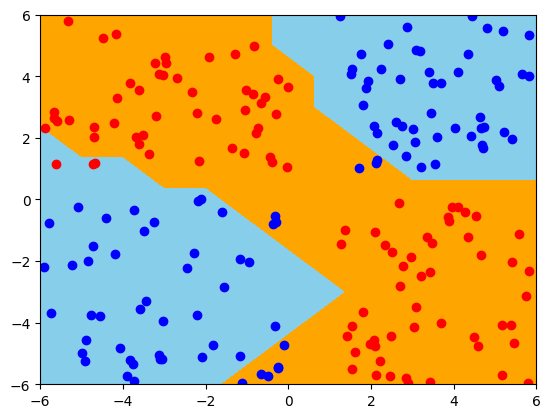

In [899]:
xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
xx1, xx2 = torch.meshgrid(xx1, xx2)
xx1 = xx1.reshape(-1, 1)
xx2 = xx2.reshape(-1, 1)
data = torch.hstack([xx1,xx2])
z = model(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(13,13)

fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')

Logistic Regression Model

In [831]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        logits = self.linear(x)
        return logits

In [832]:
# Shuffle train and test data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [833]:
X_train = pd.concat([train_data['x1'], train_data['x2'], train_data['x1']**2], axis = 1)
X_train.columns = ['x1','x2','x1^2']
X_train = torch.tensor(X_train.values, dtype= torch.float32)
y_train = train_data['y']
y_train = torch.tensor(y_train.values, dtype= torch.float32)
# y_train

In [834]:
reg = LogisticRegression(3)
opt = torch.optim.Adam(reg.parameters(), lr=0.01)
converged = False

prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = reg(X_train)
    logits = logits.reshape(-1)
    # print(logits)
    loss = F.binary_cross_entropy_with_logits(logits, y_train)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1


pred = F.sigmoid(reg(X_train))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_train = y_train.reshape(-1, 1)
correct_pred = torch.sum(pred == y_train)
acc = correct_pred / len(y_train)
print(f'Accurcay of Logistic regression using features x1, x2 and square of x1 is {acc}')

0 3.7954976558685303
10 3.112081527709961
20 2.4398012161254883
30 1.7929092645645142
40 1.217756748199463
50 0.8616735339164734
60 0.7474192976951599
70 0.7079584002494812
80 0.6951420307159424
90 0.6963534355163574
100 0.6941640973091125
110 0.6931343078613281
Accurcay of Logistic regression using features x1, x2 and square of x1 is 0.4449999928474426


In [835]:
X_train = pd.concat([train_data['x1'], train_data['x2'], train_data['x1']*train_data['x2']], axis = 1)
X_train.columns = ['x1','x2','x1x2']
X_train = torch.tensor(X_train.values, dtype= torch.float32)
y_train = train_data['y']
y_train = torch.tensor(y_train.values, dtype= torch.float32)

reg = LogisticRegression(3)
opt = torch.optim.Adam(reg.parameters(), lr=0.01)
converged = False

prev_loss = 1e8

i = 0
while not converged:
    opt.zero_grad()
    logits = reg(X_train)
    logits = logits.reshape(-1)
    loss = F.binary_cross_entropy_with_logits(logits, y_train)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True
    prev_loss = loss.item() 
    i = i + 1

0 1.1653473377227783
10 0.6470705270767212
20 0.3712030351161957
30 0.25887635350227356
40 0.2049330770969391
50 0.17418862879276276
60 0.15425296127796173
70 0.13987869024276733
80 0.128781259059906
90 0.11981771141290665
100 0.11234235763549805
110 0.10596570372581482
120 0.10043413937091827
130 0.0955715924501419
140 0.09125065803527832
150 0.08737626671791077
160 0.08387555927038193
170 0.08069160580635071
180 0.07777901738882065
190 0.07510119676589966
200 0.0726282149553299
210 0.0703352764248848
220 0.06820163130760193
230 0.06620980054140091
240 0.0643448755145073
250 0.06259409338235855
260 0.06094640865921974
270 0.059392232447862625
280 0.05792319402098656
290 0.056531939655542374
300 0.05521196499466896
310 0.053957514464855194
320 0.052763432264328
330 0.05162513628602028
340 0.05053853988647461
350 0.04949990659952164
360 0.048505913466215134
370 0.04755350947380066
380 0.04663997143507004
390 0.04576277360320091
400 0.044919658452272415
410 0.04410851001739502
420 0.0433

In [836]:
pred = F.sigmoid(reg(X_train))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_train = y_train.reshape(-1, 1)
correct_pred = torch.sum(pred == y_train)
acc = correct_pred / len(y_train)
print(f'Training accuracy using Logistic Regression {acc}')

Training accuracy using Logistic Regression 1.0


In [837]:
X_test = pd.concat([test_data['x1'], test_data['x2'], test_data['x1']*test_data['x2']], axis = 1)
X_test.columns = ['x1','x2','x1x2']
X_test = torch.tensor(X_test.values, dtype= torch.float32)
y_test = test_data['y1']
y_test = torch.tensor(y_test.values, dtype= torch.float32)


pred = F.sigmoid(reg(X_test))
pred = torch.where(pred > 0.5 , 1.0, 0.0)
y_test = y_test.reshape(-1, 1)
correct_pred = torch.sum(pred == y_test)
acc = correct_pred / len(y_test)
print(f'Testing accuracy using Logistic Regression {acc}')

Testing accuracy using Logistic Regression 1.0


Decision surface of Logistic regression

C:\Users\Hp\AppData\Local\Temp\ipykernel_14340\3339183170.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
C:\Users\Hp\AppData\Local\Temp\ipykernel_14340\3339183170.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)


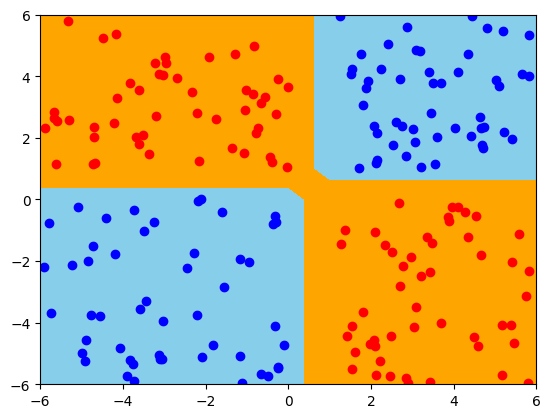

In [840]:
xx1 = torch.tensor(torch.arange(-6.0,7.0), requires_grad = False)
xx2 = torch.tensor(torch.arange(-6.0, 7.0), requires_grad = False)
xx1, xx2 = torch.meshgrid(xx1, xx2)
xx1 = xx1.reshape(-1, 1)
xx2 = xx2.reshape(-1, 1)
xx3 = xx1 * xx2
# print(xx3)
data = torch.hstack([xx1, xx2, xx3 ])
z = reg(data)
z = torch.where(z > 0.5, 1, 0)
z = z.reshape(13,13)

fig = plt.figure()
ax = plt.axes()
ax.contourf(xx, yy, z, colors = ['skyblue', 'orange', 'orange', 'skyblue'], levels = 2)
ax.scatter(test_data['x1'][test_data['y1']==0], test_data['x2'][test_data['y1']==0], color = 'blue')
ax.scatter(test_data['x1'][test_data['y1']==1], test_data['x2'][test_data['y1']==1], color = 'red')